In [272]:
import numpy as np
import sympy as sp
import math as m

In [273]:
def p2v(magnitude, degrees):
    """Returns a numpy vector from a given polar format"""
    radians = np.radians(degrees)
    x = magnitude * np.cos(radians)
    y = magnitude * np.sin(radians)
    return np.array([x,y])

def v2p(vector):
    """Returns magnitude and angle (in degrees) from a given numpy vector"""
    magnitude = np.hypot(*vector)  # Equivalent to sqrt(x**2 + y**2)
    degrees = np.degrees(np.arctan2(*vector[::-1]))
    return magnitude, degrees

def rpm2rad_s(rpm):
    rad_m = rpm*2*np.pi
    rad_s = rad_m/60
    return rad_s

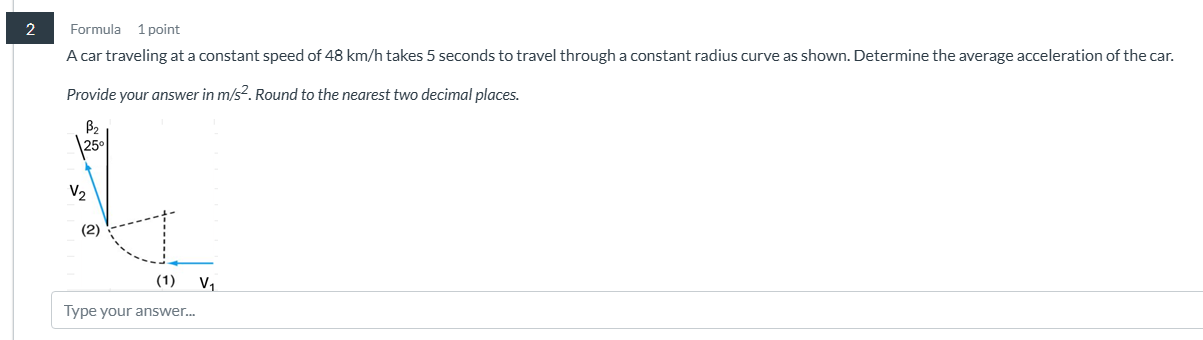

Formulas:
$$
a = \frac{\Delta V}{\Delta T}
$$
$$
1 \frac{km}{h} = \frac{1000 m}{3600 s}
$$

In [274]:
# Known Data:
v1 = p2v(48, 0) #km/h, deg
v2 = p2v(48, 90-25) #km/h, deg
t = 5 #seconds

In [275]:
kmh2ms = 1000/3600
v1 = v1* kmh2ms
v2 = v2* kmh2ms

In [276]:
delta_v = v2-v1
np.hypot(*delta_v )

np.float64(14.327989555915304)

In [277]:
a = delta_v/t
magnitude = np.hypot(*a)
magnitude

np.float64(2.8655979111830603)

Alternatively:  
Law of Cosines
$$
a^2 = b^2 + c^2 - 2bc\cos(\alpha)
$$

In [278]:
v1 = 48 * (1000/3600)
t = 5
deg = 90-25

In [279]:
a,b,c,alpha,beta,gamma = sp.symbols(r'a,b,c,\alpha,\beta,\gamma')

eq_cosines_law = sp.Eq(
    a**2,
    b**2 + c**2 - 2*(b*c*sp.cos(alpha))
    )

expr_a = sp.solve(eq_cosines_law, a)[1]
expr_a

sqrt(b**2 - 2*b*c*cos(\alpha) + c**2)

In [280]:
delta_v = expr_a.subs({
    b: v1,
    c: v1,
    alpha: np.radians(65)
}).evalf()
delta_v

14.3279895559153

In [281]:
delta_v/t

2.86559791118306

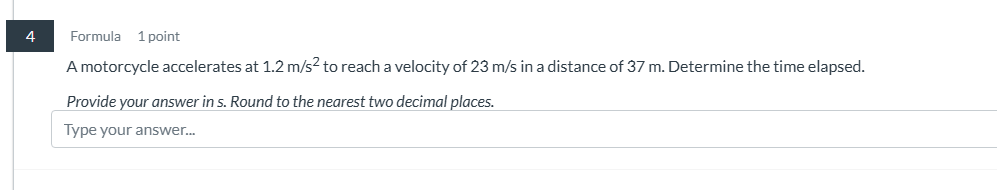

In [282]:
#Known
v1 = 23
a = 1.2
s = 37

1. **Velocity-time Equation:**
$$ 
v_f = v_i + at 
$$
$$ 
t = \frac{v_f - v_i }{a}
$$
2. **Velocity-displacement Equation:**
$$
v_f^2 = v_i^2 + 2as
$$
$$
v_i = \sqrt{v_f^2 - 2as}
$$

In [283]:
v0 = m.sqrt(v1**2 - 2*a*s)
v0

20.98094373473224

In [284]:
t = (v1-v0)/a
t

1.682546887723134

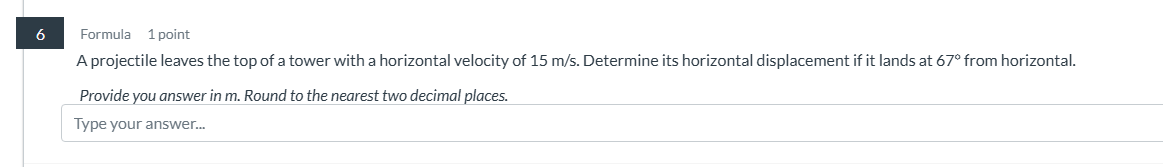

In [285]:
#Known
v_x = 15
deg = 67
g = 9.81

$$
v_f^2 = v_i^2 + 2as
$$
$$
s = vt
$$
$$
t = \frac{\Delta_V}{a}
$$
$$
\tan(\theta) = \frac{v_y}{v_x}
$$

In [286]:
 m.tan(m.radians(deg))

2.355852365823753

In [287]:
# Find final vertical velocity
v_y = v_x* m.tan(m.radians(deg))
v_y

35.3377854873563

In [288]:
# Find time of flight
t = v_y/g
t

3.6022207428497754

In [289]:
# Find vertical displacement
s_y = v_y**2/(2*g)
s_y

63.64725194446531

In [290]:
# Find horizontal displacement
s_x = v_x*t
s_x

54.03331114274663

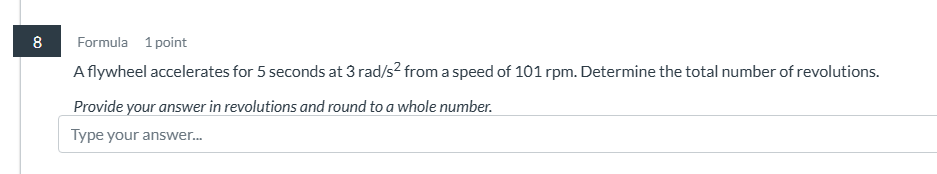

In [ ]:
#Known
t = 5
a = 3
v0_rpm = 101

#Unknown
rev = __

In [292]:
k_rmp_rad = 2*m.pi/60
v0 = v0_rpm * k_rmp_rad
v0

10.576695267085636

2. **Angular Displacment-time Equation:**  
$
\theta = \omega_i t + \frac{1}{2}\alpha t^2
$

In [293]:
theta = v0*t + 1/2*a*t**2
theta

90.38347633542818

In [294]:
rev = theta/(2*m.pi)
rev

14.384977032612742

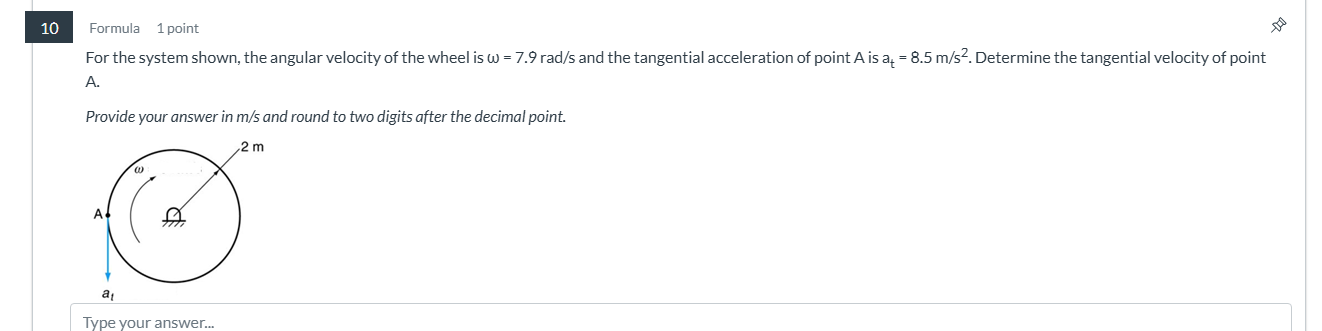

In [300]:
#Known
w = 7.9 #rad/s
r = 2 #meters

#Unknown
v_tangential = __

Tangential Velocity:  
$ v_t = \omega r $


In [301]:
v_tangential = w*r
v_tangential

15.8

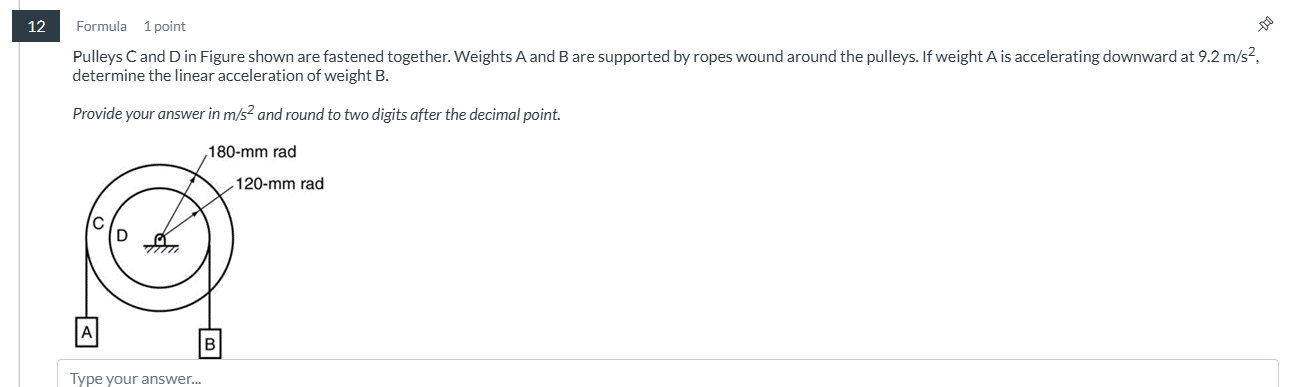

In [306]:
#Known
r_c = .18 # m
r_d = .12 # m
a_A = 9.2 # m/s

#Unknown
a_B = __

Tangential Acceleration:  
$ a_t = \alpha r $  
$ \alpha = \frac{a_t}{r} $

In [307]:
alpha = a_A/r_c
alpha # rad/s

51.11111111111111

In [308]:
a_B = alpha*r_d
a_B # m/s

6.133333333333333

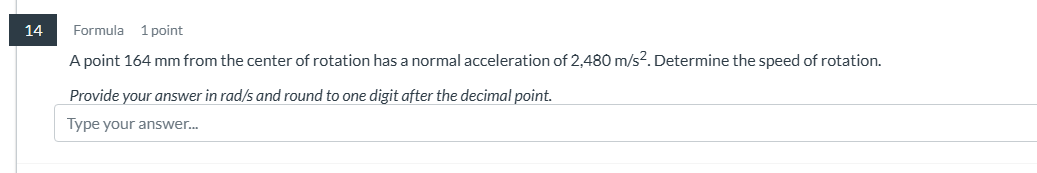

In [309]:
# Known
r_a = .164 # m
a_normal = 2480 #m/s/s

#Unknown
w = __

Normal Acceleration:  
$ a_n = \omega^2 r $  
$ \omega = \sqrt{\frac{a_n}{r}} $


In [310]:
w = m.sqrt(a_normal/r_a)
w #rad /s

122.97134308249298

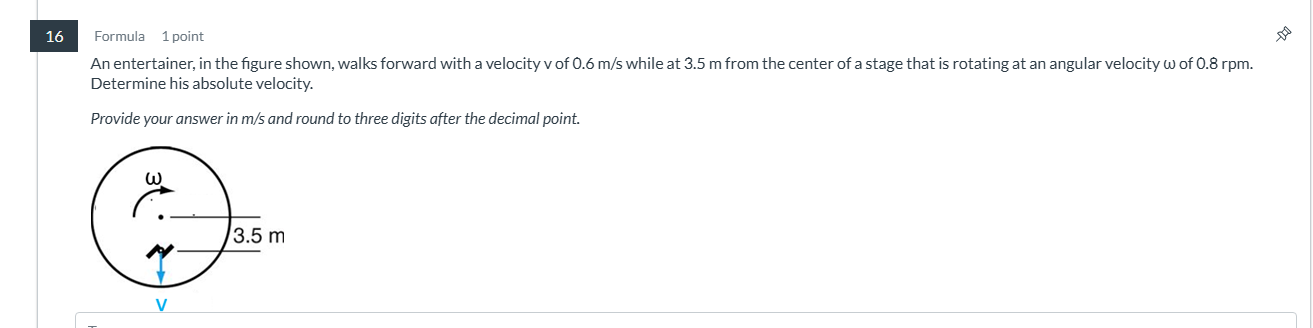

In [314]:
# Known
v = .6 #m/s
r = 3.5 #m
w_rpm = .8 #rpm

# Unkown
v_absolute = __

Formulas:  
$ v_t = \omega r $  
$ |\vec{v}| = \sum \vec{v} $

In [313]:
k_rmp_rad = 2*m.pi/60
w = w_rpm * k_rmp_rad
w # rad/s

0.08377580409572782

In [315]:
v_tangential = w*r
v_tangential

0.2932153143350474

In [ ]:
v_absolute = m.hypot(v, v_tangential) #Since vectors are perpendicular
v_absolute

0.667813761883207

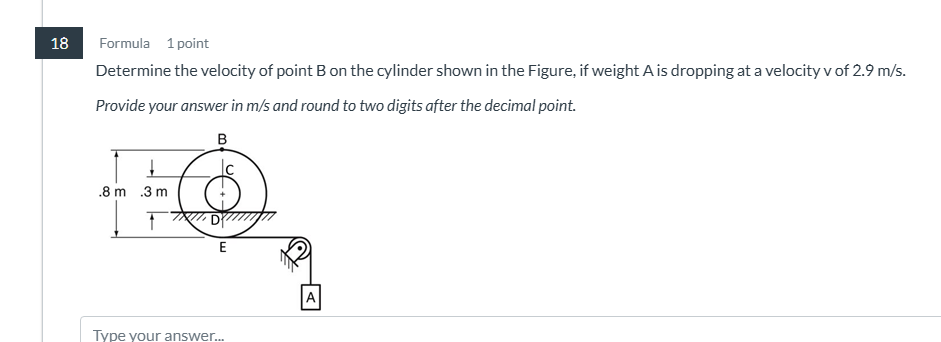

In [ ]:
# Known
v = 2.9 #m/s
CD = .3 #m
BE = .8 #m

# Unknown
v_B = __ #m/s

Formulas:  
$ v_t = \omega r $  

In [319]:
# We need to treat point D as center of rotation
DE = BE/2 - CD/2
BD = BE - DE
DE, BD

(0.25, 0.55)

In [320]:
w = v/DE
w # rad/s

11.6

In [321]:
v_B = w * BD
v_B # m/s

6.38